# Announcement-on-ML
<a href='http://www.kgptalkie.com' target="_blank"> <img src='https://github.com/laxmimerit/Important-Announcement-on-ML/raw/master/kgptalkie_strips.png'/></a>

# ML Resources
|  ML Course | Description |
|:---|:---|
| [**Master LangGraph with Ollama - Agentic Chatbot and RAG**](https://www.udemy.com/course/langgraph-with-ollama/?referralCode=B646DCB44A189BEBC20C) | Master LangGraph, Ollama, and Agentic RAG. Ollama, LLAMA, LLAMA 3.2, FAISS, RAG, Deploy RAG, Gen AI, LLM|
| [**Master Langchain and Ollama - Chatbot, RAG and Agents**](https://www.udemy.com/course/ollama-and-langchain/?referralCode=7F4C0C7B8CF223BA9327) | Master Langchain v0.3, Private Chatbot, Deploy LLM App.  Ollama, LLAMA, LLAMA 3.2, FAISS, RAG, Deploy RAG, Gen AI, LLM|
| [**Fine Tuning LLM with HuggingFace Transformers for NLP**](https://www.udemy.com/course/fine-tuning-llm-with-hugging-face-transformers/?referralCode=6DEB3BE17C2644422D8E) | Learn how to fine tune LLM with custom dataset. You will learn basics of transformers then fine tune LLM|
| [**Data Visualization in Python Masterclass™: Beginners to Pro**](https://bit.ly/udemy95off_kgptalkie) |  Learn to build Machine Learning and Deep Learning models using Python and its libraries like Scikit-Learn, Keras, and TensorFlow. |
| [**Python for Machine Learning: A Step-by-Step Guide**](https://bit.ly/ml-ds-project) | Learn to build Machine Learning and Deep Learning models using Python and its libraries like Scikit-Learn, Keras, and TensorFlow. |
| [**Deep Learning for Beginners with Python**](https://bit.ly/dl-with-python) | Neural Networks, TensorFlow, ANN, CNN, RNN, LSTM, Transfer Learning and Much More. |
| [**Python for Linear Regression in Machine Learning**](https://bit.ly/regression-python) | Learn to build Linear Regression models using Python and its libraries like Scikit-Learn. |
| [**Introduction to Spacy 3 for Natural Language Processing**](https://bit.ly/spacy-intro) | Learn to build Natural Language Processing models using Python and its libraries like Spacy. |
| [**Advanced Machine Learning and Deep Learning Projects**](https://bit.ly/kgptalkie_ml_projects) | Learn to build Advanced Machine Learning and Deep Learning models using Python and transformer models like BERT, GPT-2, and XLNet. |
| [**Natural Language Processing in Python for Beginners**](https://bit.ly/intro_nlp) | Learn to build Natural Language Processing Projects using Spacy, NLTK, and Gensim, and transformer models like BERT, GPT-2, and XLNet. |
| [**Deployment of Machine Learning Models in Production in Python**](https://bit.ly/bert_nlp) |  Learn to deploy Machine Learning and Deep Learning models using Python and its libraries like Flask, Streamlit, and NGINX. |
| [**R 4.0 Programming for Data Science - Beginners to Pro**](https://bit.ly/r4-ml) | Learn to build Machine Learning and Deep Learning models using R and its libraries like caret, tidyverse, and keras. |


## Text to MySQL Agent

- This simple agent responds to a text message with a MySQL query execution result.
- The agent is built using LangGraph
- We will start with simple linear flow and then add more complex flows
- For this example, We will use `Chinook` database which is sample database available for `sqlite`
- You can tryout this for any database `sqlite` or `mysql` or `postgresql` by changing the connection string

In [1]:
from dotenv import load_dotenv
import os

load_dotenv('../.env')

True

## Download the Chinook database

In [4]:
import requests

url = "https://github.com/laxmimerit/All-CSV-ML-Data-Files-Download/raw/refs/heads/master/db_samples/Chinook.db"

response = requests.get(url)

if response.status_code == 200:
    with open("Chinook.db", "wb") as file:
        file.write(response.content)

    print("File downloaded successfully")

else:
    print("Failed to download the file")
    print(response.status_code)

File downloaded successfully


## LLM Connection and MySQL Tools

In [5]:
from langchain_community.utilities import SQLDatabase

db = SQLDatabase.from_uri("sqlite:///Chinook.db")

In [9]:
db.dialect

print(db.get_usable_table_names())

['Album', 'Artist', 'Customer', 'Employee', 'Genre', 'Invoice', 'InvoiceLine', 'MediaType', 'Playlist', 'PlaylistTrack', 'Track']


In [14]:
db.run("SELECT * FROM album LIMIT 2")

db.run("SELECT * FROM artist LIMIT 2")

"[(1, 'AC/DC'), (2, 'Accept')]"

In [17]:
db.run("select * from Invoice as inv join Customer as c on inv.CustomerId=c.CustomerId LIMIT 1")

"[(1, 2, '2009-01-01 00:00:00', 'Theodor-Heuss-Straße 34', 'Stuttgart', None, 'Germany', '70174', 1.98, 'Leonie', 'Köhler', None, 'Theodor-Heuss-Straße 34', 'Stuttgart', None, 'Germany', '70174', '+49 0711 2842222', None, 'leonekohler@surfeu.de', 5)]"

### LLM Connection

In [22]:
from langchain_ollama import ChatOllama


model = "qwen2.5" # llama3.2:3b
llm = ChatOllama(model=model, base_url = "http://localhost:11434")

llm.invoke("Hello")

AIMessage(content='Hello! How can I assist you today?', additional_kwargs={}, response_metadata={'model': 'qwen2.5', 'created_at': '2024-12-01T07:37:27.2500459Z', 'message': {'role': 'assistant', 'content': ''}, 'done_reason': 'stop', 'done': True, 'total_duration': 12729079900, 'load_duration': 8805006000, 'prompt_eval_count': 30, 'prompt_eval_duration': 1127700000, 'eval_count': 10, 'eval_duration': 2790442000}, id='run-a6b60b61-e86e-453c-9d03-4da0e61fa1ac-0', usage_metadata={'input_tokens': 30, 'output_tokens': 10, 'total_tokens': 40})

## Application State or Graph State

In [23]:
from typing import  TypedDict, Annotated

class State(TypedDict):
    question: str # user question
    query: str # mysql query prepared by llm
    result: str # mysql result
    answer: str # llm answer

In [24]:
from langchain import hub

query_prompt_template = hub.pull("langchain-ai/sql-query-system-prompt")


In [28]:
query_prompt_template.messages[0].pretty_print()

================================ System Message ================================

Given an input question, create a syntactically correct {dialect} query to run to help find the answer. Unless the user specifies in his question a specific number of examples they wish to obtain, always limit your query to at most {top_k} results. You can order the results by a relevant column to return the most interesting examples in the database.

Never query for all the columns from a specific table, only ask for a the few relevant columns given the question.

Pay attention to use only the column names that you can see in the schema description. Be careful to not query for columns that do not exist. Also, pay attention to which column is in which table.

Only use the following tables:
{table_info}

Question: {input}


## Write, Execute and Generate MySQL Response

### `Write` Node for MySQL Query

In [32]:
from typing import Annotated

class QueryOutput(TypedDict):
    """Generated SQL query"""

    query: Annotated[str, ..., "Syntactically correct and valid SQL query"]

QueryOutput({"query": "SELECT * FROM album LIMIT 2"})
QueryOutput.__annotations__

{'query': typing.Annotated[str, Ellipsis, 'Syntactically correct and valid SQL query']}

In [38]:
# print(db.get_table_info())

In [40]:
llm.with_structured_output(QueryOutput)

RunnableBinding(bound=ChatOllama(model='qwen2.5', base_url='http://localhost:11434'), kwargs={'tools': [{'type': 'function', 'function': {'name': 'QueryOutput', 'description': 'Generated SQL query', 'parameters': {'type': 'object', 'properties': {'query': {'description': 'Syntactically correct and valid SQL query', 'type': 'string'}}, 'required': ['query']}}}], 'tool_choice': 'any'}, config={}, config_factories=[])
| JsonOutputKeyToolsParser(first_tool_only=True, key_name='QueryOutput')

In [41]:
def write_query(state:State):
    """Generate MySQL query to fetch information"""
    prompt = query_prompt_template.invoke({
        "dialect": db.dialect,
        "top_k": 5,
        "table_info": db.get_table_info(),
        "input": state["question"]
    })

    structured_llm = llm.with_structured_output(QueryOutput)

    result = structured_llm.invoke(prompt)

    return {"query": result["query"]}

write_query({"question": "List all the albums"})

{'query': 'SELECT AlbumId, Title FROM Album'}

In [42]:
query_prompt_template

write_query({"question": "How many employees are there?"})

{'query': 'SELECT COUNT(*) AS EmployeeCount FROM Employee'}

### Execute Query

In [44]:
db.run('SELECT COUNT(*) AS EmployeeCount FROM Employee')
db.run('SELECT AlbumId, Title FROM Album')

'[(1, \'For Those About To Rock We Salute You\'), (2, \'Balls to the Wall\'), (3, \'Restless and Wild\'), (4, \'Let There Be Rock\'), (5, \'Big Ones\'), (6, \'Jagged Little Pill\'), (7, \'Facelift\'), (8, \'Warner 25 Anos\'), (9, \'Plays Metallica By Four Cellos\'), (10, \'Audioslave\'), (11, \'Out Of Exile\'), (12, \'BackBeat Soundtrack\'), (13, \'The Best Of Billy Cobham\'), (14, \'Alcohol Fueled Brewtality Live! [Disc 1]\'), (15, \'Alcohol Fueled Brewtality Live! [Disc 2]\'), (16, \'Black Sabbath\'), (17, \'Black Sabbath Vol. 4 (Remaster)\'), (18, \'Body Count\'), (19, \'Chemical Wedding\'), (20, \'The Best Of Buddy Guy - The Millenium Collection\'), (21, \'Prenda Minha\'), (22, \'Sozinho Remix Ao Vivo\'), (23, \'Minha Historia\'), (24, \'Afrociberdelia\'), (25, \'Da Lama Ao Caos\'), (26, \'Acústico MTV [Live]\'), (27, \'Cidade Negra - Hits\'), (28, \'Na Pista\'), (29, \'Axé Bahia 2001\'), (30, \'BBC Sessions [Disc 1] [Live]\'), (31, \'Bongo Fury\'), (32, \'Carnaval 2001\'), (33, \'

In [46]:
from langchain_community.tools.sql_database.tool import QuerySQLDataBaseTool

def execute_query(state:State):
    """Execute SQL query and return the result"""
    query = state["query"]
    execute_query_tool = QuerySQLDataBaseTool(db=db)

    return {'result': execute_query_tool.invoke({"query": query})}

execute_query({"query": "SELECT * FROM album LIMIT 2"})

{'result': "[(1, 'For Those About To Rock We Salute You', 1), (2, 'Balls to the Wall', 2)]"}

### Generate Answer

In [ ]:

# question, query, result, answer
def generate_answer(state:State):
    """Generate answer using retrieved information as the context""" 

    prompt = (
        "Given the following user question, corresponding SQL query, "
        "and SQL result, answer the user question.\n\n"
        f'Question: {state["question"]}\n'
        f'SQL Query: {state["query"]}\n'
        f'SQL Result: {state["result"]}'
    )

    response = llm.invoke(prompt)

    return {"answer": response.content}



In [48]:
question = "how many employees are there?"
query = write_query({"question": question})
query

{'query': 'SELECT COUNT(*) AS NumberOfEmployees FROM Employee;'}

In [49]:
result = execute_query(query)
result

{'result': '[(8,)]'}

In [50]:
state = {"question": question, **query, **result}
state

{'question': 'how many employees are there?',
 'query': 'SELECT COUNT(*) AS NumberOfEmployees FROM Employee;',
 'result': '[(8,)]'}

In [51]:
generate_answer(state)

{'answer': 'Based on the provided SQL query and result, there are 8 employees in total. The `COUNT(*)` function returned the number of rows in the `Employee` table, which corresponds to the number of employees.'}

## Building Graph

In [53]:
from langgraph.graph import  START, StateGraph
from IPython.display import display, Image

In [56]:
graph_builder = StateGraph(State)

graph_builder.add_node("write_query", write_query)
graph_builder.add_node("execute_query", execute_query)
graph_builder.add_node("generate_answer", generate_answer)

graph_builder.add_edge(START, "write_query")
graph_builder.add_edge("write_query", "execute_query")
graph_builder.add_edge("execute_query", "generate_answer")

graph = graph_builder.compile()

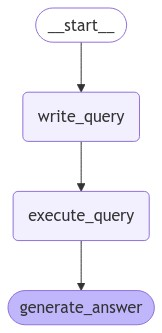

In [57]:
display(Image(graph.get_graph().draw_mermaid_png()))

In [58]:
query = {'question': 'List all the albums'}
for step in graph.stream(query, stream_mode="updates"):
    print(step)

{'write_query': {'query': 'SELECT AlbumId, Title FROM Album'}}
{'execute_query': {'result': '[(1, \'For Those About To Rock We Salute You\'), (2, \'Balls to the Wall\'), (3, \'Restless and Wild\'), (4, \'Let There Be Rock\'), (5, \'Big Ones\'), (6, \'Jagged Little Pill\'), (7, \'Facelift\'), (8, \'Warner 25 Anos\'), (9, \'Plays Metallica By Four Cellos\'), (10, \'Audioslave\'), (11, \'Out Of Exile\'), (12, \'BackBeat Soundtrack\'), (13, \'The Best Of Billy Cobham\'), (14, \'Alcohol Fueled Brewtality Live! [Disc 1]\'), (15, \'Alcohol Fueled Brewtality Live! [Disc 2]\'), (16, \'Black Sabbath\'), (17, \'Black Sabbath Vol. 4 (Remaster)\'), (18, \'Body Count\'), (19, \'Chemical Wedding\'), (20, \'The Best Of Buddy Guy - The Millenium Collection\'), (21, \'Prenda Minha\'), (22, \'Sozinho Remix Ao Vivo\'), (23, \'Minha Historia\'), (24, \'Afrociberdelia\'), (25, \'Da Lama Ao Caos\'), (26, \'Acústico MTV [Live]\'), (27, \'Cidade Negra - Hits\'), (28, \'Na Pista\'), (29, \'Axé Bahia 2001\'), (3

In [60]:
# query = {'question': 'Hello'}
# for step in graph.stream(query, stream_mode="updates"):
#     print(step)

## LangGraph AGENTS

- They can query the database as many times as needed to answer the user question.
- They can recover from errors by running a generated query, catching the traceback and regenerating it correctly.
- They can answer questions based on the databases' schema as well as on the databases' content (like describing a specific table).

In [61]:
from langchain import hub

prompt = hub.pull("langchain-ai/sql-agent-system-prompt")

In [63]:
prompt.messages[0].pretty_print()

================================ System Message ================================

You are an agent designed to interact with a SQL database.
Given an input question, create a syntactically correct {dialect} query to run, then look at the results of the query and return the answer.
Unless the user specifies a specific number of examples they wish to obtain, always limit your query to at most {top_k} results.
You can order the results by a relevant column to return the most interesting examples in the database.
Never query for all the columns from a specific table, only ask for the relevant columns given the question.
You have access to tools for interacting with the database.
Only use the below tools. Only use the information returned by the below tools to construct your final answer.
You MUST double check your query before executing it. If you get an error while executing a query, rewrite the query and try again.

DO NOT make any DML statements (INSERT, UPDATE, DELETE, DROP etc.) to th

In [93]:
system_prompt = prompt.invoke({'dialect': db.dialect, 'top_k': 5})
system_prompt = prompt.format(dialect = db.dialect, top_k = 5)

In [94]:
system_prompt

'System: You are an agent designed to interact with a SQL database.\nGiven an input question, create a syntactically correct sqlite query to run, then look at the results of the query and return the answer.\nUnless the user specifies a specific number of examples they wish to obtain, always limit your query to at most 5 results.\nYou can order the results by a relevant column to return the most interesting examples in the database.\nNever query for all the columns from a specific table, only ask for the relevant columns given the question.\nYou have access to tools for interacting with the database.\nOnly use the below tools. Only use the information returned by the below tools to construct your final answer.\nYou MUST double check your query before executing it. If you get an error while executing a query, rewrite the query and try again.\n\nDO NOT make any DML statements (INSERT, UPDATE, DELETE, DROP etc.) to the database.\n\nTo start you should ALWAYS look at the tables in the datab

In [92]:
prompt

ChatPromptTemplate(input_variables=['dialect', 'top_k'], input_types={}, partial_variables={}, metadata={'lc_hub_owner': 'langchain-ai', 'lc_hub_repo': 'sql-agent-system-prompt', 'lc_hub_commit_hash': '31156d5fe3945188ee172151b086712d22b8c70f8f1c0505f5457594424ed352'}, messages=[SystemMessagePromptTemplate(prompt=PromptTemplate(input_variables=['dialect', 'top_k'], input_types={}, partial_variables={}, template='You are an agent designed to interact with a SQL database.\nGiven an input question, create a syntactically correct {dialect} query to run, then look at the results of the query and return the answer.\nUnless the user specifies a specific number of examples they wish to obtain, always limit your query to at most {top_k} results.\nYou can order the results by a relevant column to return the most interesting examples in the database.\nNever query for all the columns from a specific table, only ask for the relevant columns given the question.\nYou have access to tools for interact

In [67]:
from langchain_community.agent_toolkits import SQLDatabaseToolkit

toolkit = SQLDatabaseToolkit(db=db, llm=llm)

In [69]:
toolkit.get_context()

{'table_info': '\nCREATE TABLE "Album" (\n\t"AlbumId" INTEGER NOT NULL, \n\t"Title" NVARCHAR(160) NOT NULL, \n\t"ArtistId" INTEGER NOT NULL, \n\tPRIMARY KEY ("AlbumId"), \n\tFOREIGN KEY("ArtistId") REFERENCES "Artist" ("ArtistId")\n)\n\n/*\n3 rows from Album table:\nAlbumId\tTitle\tArtistId\n1\tFor Those About To Rock We Salute You\t1\n2\tBalls to the Wall\t2\n3\tRestless and Wild\t2\n*/\n\n\nCREATE TABLE "Artist" (\n\t"ArtistId" INTEGER NOT NULL, \n\t"Name" NVARCHAR(120), \n\tPRIMARY KEY ("ArtistId")\n)\n\n/*\n3 rows from Artist table:\nArtistId\tName\n1\tAC/DC\n2\tAccept\n3\tAerosmith\n*/\n\n\nCREATE TABLE "Customer" (\n\t"CustomerId" INTEGER NOT NULL, \n\t"FirstName" NVARCHAR(40) NOT NULL, \n\t"LastName" NVARCHAR(20) NOT NULL, \n\t"Company" NVARCHAR(80), \n\t"Address" NVARCHAR(70), \n\t"City" NVARCHAR(40), \n\t"State" NVARCHAR(40), \n\t"Country" NVARCHAR(40), \n\t"PostalCode" NVARCHAR(10), \n\t"Phone" NVARCHAR(24), \n\t"Fax" NVARCHAR(24), \n\t"Email" NVARCHAR(60) NOT NULL, \n\t"Supp

In [72]:
tools = toolkit.get_tools()
tools

[QuerySQLDataBaseTool(description="Input to this tool is a detailed and correct SQL query, output is a result from the database. If the query is not correct, an error message will be returned. If an error is returned, rewrite the query, check the query, and try again. If you encounter an issue with Unknown column 'xxxx' in 'field list', use sql_db_schema to query the correct table fields.", db=<langchain_community.utilities.sql_database.SQLDatabase object at 0x000001DBB1DA0740>),
 InfoSQLDatabaseTool(description='Input to this tool is a comma-separated list of tables, output is the schema and sample rows for those tables. Be sure that the tables actually exist by calling sql_db_list_tables first! Example Input: table1, table2, table3', db=<langchain_community.utilities.sql_database.SQLDatabase object at 0x000001DBB1DA0740>),
 ListSQLDatabaseTool(db=<langchain_community.utilities.sql_database.SQLDatabase object at 0x000001DBB1DA0740>),
 QuerySQLCheckerTool(description='Use this tool to 

In [74]:
tools[0].invoke("select * from Album LIMIT 2")

"[(1, 'For Those About To Rock We Salute You', 1), (2, 'Balls to the Wall', 2)]"

In [80]:
# print(tools[1].invoke("Album,Customer"))

### Agent Coding

In [88]:
from langgraph.prebuilt import create_react_agent
from langchain_core.messages import HumanMessage

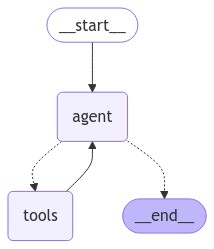

In [95]:
agent_executor = create_react_agent(llm, tools, state_modifier=system_prompt)

display(Image(agent_executor.get_graph().draw_mermaid_png()))

In [98]:
question = "Which country's customers have made the most purchases?"
query = {"messages": [HumanMessage(question)]}

for step in agent_executor.stream(query, stream_mode="updates"):
    print(step)
    # step['messages'][-1].pretty_print()

{'agent': {'messages': [AIMessage(content='', additional_kwargs={}, response_metadata={'model': 'qwen2.5', 'created_at': '2024-12-01T10:32:48.0935279Z', 'message': {'role': 'assistant', 'content': '', 'tool_calls': [{'function': {'name': 'sql_db_list_tables', 'arguments': {}}}]}, 'done_reason': 'stop', 'done': True, 'total_duration': 11269516000, 'load_duration': 34488000, 'prompt_eval_count': 717, 'prompt_eval_duration': 810233000, 'eval_count': 18, 'eval_duration': 10415309000}, id='run-956ec9dd-e16a-4b51-9d09-0ca2cdd4a616-0', tool_calls=[{'name': 'sql_db_list_tables', 'args': {}, 'id': '08a9c52e-c4b1-4b24-96fa-f41a74636747', 'type': 'tool_call'}], usage_metadata={'input_tokens': 717, 'output_tokens': 18, 'total_tokens': 735})]}}
{'tools': {'messages': [ToolMessage(content='Album, Artist, Customer, Employee, Genre, Invoice, InvoiceLine, MediaType, Playlist, PlaylistTrack, Track', name='sql_db_list_tables', id='1da940da-02fa-467d-bfca-0c8c68760733', tool_call_id='08a9c52e-c4b1-4b24-96